<a href="https://colab.research.google.com/github/ParitoshP702/Stock_Price_Prediction/blob/main/Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#unzipping our data
import zipfile
zip_ref = zipfile.ZipFile("/content/S&P500.zip")
zip_ref.extractall()
zip_ref.close()

## Creating our dataframe , extracting the part of MMM stocks from our Standard and Poor 500 index dataframe and visualising th adjusted close price of our Dataframe.

In [ ]:
import pandas as pd
#Creating our dataframe with pandas
df = pd.read_csv("/content/sp500_stocks.csv", parse_dates = ["Date"], index_col = "Date")
df

,Symbol,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2009-12-31,MMM,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,MMM,59.318886,83.019997,83.449997,82.669998,83.089996,3043700.0
2010-01-05,MMM,58.947342,82.500000,83.230003,81.699997,82.800003,2847000.0
2010-01-06,MMM,59.783295,83.669998,84.599998,83.510002,83.879997,5268500.0
2010-01-07,MMM,59.826176,83.730003,83.760002,82.120003,83.320000,4470100.0
...,...,...,...,...,...,...,...
2022-09-27,ZTS,149.399994,149.399994,151.139999,147.770004,150.089996,1930900.0
2022-09-28,ZTS,152.259995,152.259995,154.000000,150.089996,151.320007,2079200.0
2022-09-29,ZTS,150.949997,150.949997,152.559998,150.000000,152.059998,1642000.0


In [ ]:
import matplotlib.pyplot as plt
stocks_data= pd.DataFrame(df["Adj Close"].iloc[:3216].dropna())
stocks_data

,Adj Close
Date,
2010-01-04,59.318886
2010-01-05,58.947342
2010-01-06,59.783295
2010-01-07,59.826176
2010-01-08,60.247749
...,...
2022-09-27,112.410004
2022-09-28,114.279999
2022-09-29,112.300003


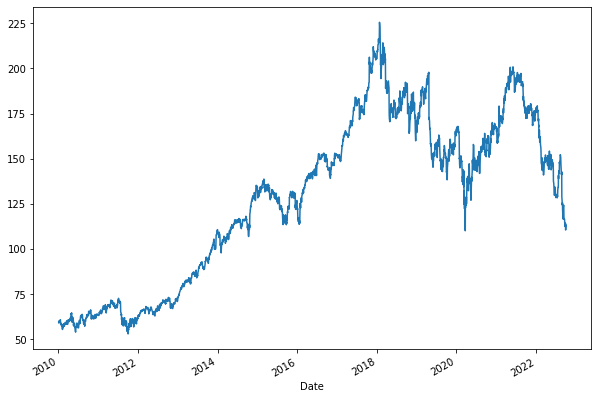

In [ ]:
stocks_data["Adj Close"].plot(figsize = (10,7))

In [ ]:
#Now since we are concerned only with the adjusted close price we wiil extract it from our dataframe
mm_price = stocks_data["Adj Close"].to_numpy()
mm_price

array([ 59.3188858 ,  58.94734192,  59.78329468, ..., 112.30000305,
       110.5       , 113.22000122])

In [ ]:
timesteps = stocks_data.index.to_numpy()
timesteps

array(['2010-01-04T00:00:00.000000000', '2010-01-05T00:00:00.000000000',
       '2010-01-06T00:00:00.000000000', ...,
       '2022-09-29T00:00:00.000000000', '2022-09-30T00:00:00.000000000',
       '2022-10-03T00:00:00.000000000'], dtype='datetime64[ns]')

Text(0, 0.5, 'Price')

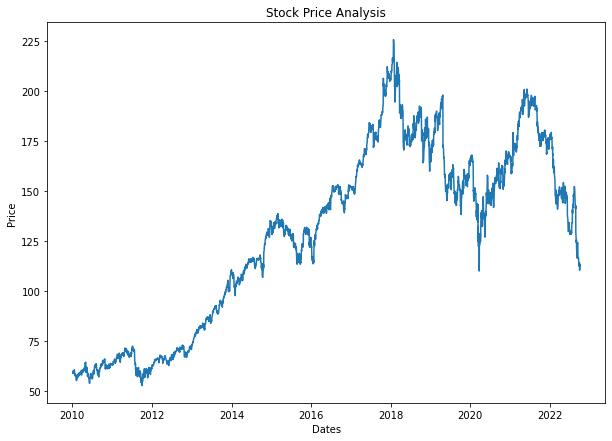

In [ ]:
#Visualizing our mmm stock price data
plt.figure(figsize = (10,7))
plt.plot(timesteps, mm_price)

plt.title("Stock Price Analysis")
plt.xlabel("Dates")
plt.ylabel("Price")

# Creating the train and test splits of our timeseries data

In [ ]:
split_size = int(0.8*len(mm_price))
x_train, y_train = timesteps[:split_size], mm_price[:split_size]
x_test, y_test = timesteps[split_size:], mm_price[split_size:]
y_train

array([ 59.3188858 ,  58.94734192,  59.78329468, ..., 132.31143188,
       122.2536087 , 125.55019379])

In [ ]:
#creating a plotting functio to plot our time series data
def plot_time_series(timesteps, mm_price, start = 0, end = None, label = None, format = "."):
  """plot the series of prices against the timesteps"""
  plt.plot(timesteps[start:end],mm_price[start:end], label = label)
  plt.xlabel("Dates")
  plt.ylabel("Prices")
  if label:
    plt.legend(fontsize = 14)
  plt.grid(True)  

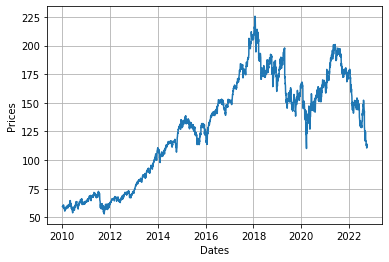

In [ ]:
plot_time_series(timesteps, mm_price)

#Model 1 
Making and starting with a naive forecast model(window size = 7 and horizon =1)

We will create a function to preprocess our data to windows and horizons

In [ ]:
HORIZON =1
import tensorflow as tf
def get_labelled_window(x, horizon = HORIZON):
  """Creates labels for windowed dataset"""
  return x[:,:-horizon], x[:,-horizon:]

In [ ]:
test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8)+1,axis = 0))
test_window, test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[8]], dtype=int32)>)

In [ ]:
WINDOW_SIZE = 7
import numpy as np
def make_windows(x, horizon = HORIZON, window_size = WINDOW_SIZE):
  #1. create a window of specific window size
  window_step = np.expand_dims(np.arange(window_size+ horizon), axis = 0)
  #2. Use numpy indexing to create a 2D array of multiple windows
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis = 0).T
  windowed_array = x[window_indexes]
  windows,labels = get_labelled_window(windowed_array, horizon = horizon)
  return windows, labels


In [ ]:
full_windows, full_labels = make_windows(mm_price, window_size = WINDOW_SIZE, horizon = HORIZON)
full_windows

array([[ 59.3188858 ,  58.94734192,  59.78329468, ...,  60.24774933,
         60.00482559,  60.0548439 ],
       [ 58.94734192,  59.78329468,  59.82617569, ...,  60.00482559,
         60.0548439 ,  59.86194229],
       [ 59.78329468,  59.82617569,  60.24774933, ...,  60.0548439 ,
         59.86194229,  59.66186523],
       ...,
       [116.51999664, 114.80999756, 114.13999939, ..., 113.        ,
        112.41000366, 114.27999878],
       [114.80999756, 114.13999939, 112.98999786, ..., 112.41000366,
        114.27999878, 112.30000305],
       [114.13999939, 112.98999786, 113.        , ..., 114.27999878,
        112.30000305, 110.5       ]])

In [ ]:
#training our windowed datasets to train and test windows
def make_train_test_splits(windows, labels, test_split = 0.2):
  split_size = int(len(windows)*(1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:] 
  return train_windows, train_labels, test_windows, test_labels

In [ ]:
train_windows, train_labels,test_windows, test_labels = make_train_test_splits(full_windows, full_labels)
train_windows

array([[ 59.3188858 ,  58.94734192,  59.78329468, ...,  60.24774933,
         60.00482559,  60.0548439 ],
       [ 58.94734192,  59.78329468,  59.82617569, ...,  60.00482559,
         60.0548439 ,  59.86194229],
       [ 59.78329468,  59.82617569,  60.24774933, ...,  60.0548439 ,
         59.86194229,  59.66186523],
       ...,
       [141.39804077, 143.48991394, 134.53405762, ..., 137.50379944,
        124.74704742, 132.31143188],
       [143.48991394, 134.53405762, 143.16305542, ..., 124.74704742,
        132.31143188, 122.2536087 ],
       [134.53405762, 143.16305542, 137.50379944, ..., 132.31143188,
        122.2536087 , 125.55019379]])

In [ ]:
#Creating a model checkpoint callback to save the weights of our model
import os
def create_model_checkpoint(model_name, save_path= "model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path, model_name), verbose = 0, save_best_only = True)

# Building and compiling our first time series forecasting model using Sequential API

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(HORIZON, activation = "linear")
], name = "model_1")

In [ ]:
model_1.compile(loss = "mae", optimizer = tf.keras.optimizers.Adam(), metrics = ["mae","mse"])

In [ ]:
#Fitting our model
model_1.fit(x= train_windows,y = train_labels,epochs = 100, verbose = 1,batch_size = 128, validation_data = (test_windows,test_labels),
            callbacks = [create_model_checkpoint(model_name = model_1.name)])

Epoch 1/100
21/21 [==============================] - 1s 33ms/step - loss: 25.5919 - mae: 25.5919 - mse: 1274.9496 - val_loss: 4.7369 - val_mae: 4.7369 - val_mse: 32.8427
Epoch 2/100
21/21 [==============================] - 0s 19ms/step - loss: 3.4348 - mae: 3.4348 - mse: 20.4717 - val_loss: 3.1289 - val_mae: 3.1289 - val_mse: 16.3016
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 1.9549 - mae: 1.9549 - mse: 8.7120 - val_loss: 3.1289 - val_mae: 3.1289 - val_mse: 16.2609
Epoch 4/100
21/21 [==============================] - 0s 18ms/step - loss: 1.8251 - mae: 1.8251 - mse: 8.0326 - val_loss: 2.8554 - val_mae: 2.8554 - val_mse: 14.3943
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 1.7934 - mae: 1.7934 - mse: 7.7706 - val_loss: 3.0156 - val_mae: 3.0156 - val_mse: 16.1630
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 1.8835 - mae: 1.8835 - mse: 8.3077 - val_loss: 2.8941 - val_mae: 2.8941 - val_mse: 15.0442
Epoch 7

In [ ]:
model_1.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 949us/step - loss: 2.0829 - mae: 2.0829 - mse: 8.2883


[2.0828568935394287, 2.0828568935394287, 8.2882661819458]

In [ ]:
#Loading our best saved model
model_1 = tf.keras.models.load_model("model_experiments/model_1/")
model_1.evaluate(test_windows,test_labels)

21/21 [==============================] - 0s 1ms/step - loss: 2.0489 - mae: 2.0489 - mse: 7.9335


[2.048914670944214, 2.048914670944214, 7.933521270751953]

Creating a function to make predictions

In [ ]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)
model_1_preds = make_preds(model_1, test_windows)  

In [ ]:
model_1_preds

<tf.Tensor: shape=(641,), dtype=float32, numpy=
array([127.60929 , 128.50723 , 122.01162 , 116.980965, 119.20835 ,
       120.87333 , 124.149895, 125.777504, 126.76418 , 126.07422 ,
       125.89466 , 126.97025 , 126.39972 , 128.23328 , 132.15375 ,
       135.73857 , 136.85062 , 137.3039  , 138.03622 , 136.89113 ,
       135.93628 , 136.64616 , 135.38164 , 133.6204  , 134.30586 ,
       134.2902  , 135.69939 , 139.90668 , 143.68597 , 144.86151 ,
       143.61789 , 140.96205 , 139.21872 , 138.38179 , 137.75311 ,
       137.21887 , 137.92741 , 137.00484 , 134.73552 , 131.02003 ,
       128.7228  , 128.76967 , 134.1801  , 136.99715 , 138.72554 ,
       138.17911 , 137.7047  , 139.9041  , 145.01352 , 146.65904 ,
       147.52065 , 147.00749 , 147.29416 , 149.49655 , 151.85197 ,
       154.91792 , 156.38864 , 156.6707  , 155.60191 , 149.7765  ,
       147.31915 , 148.0836  , 149.18755 , 150.26936 , 150.94484 ,
       149.40704 , 148.48003 , 148.62132 , 146.31343 , 145.93462 ,
       145.047

# Building our Conv1D model and preparing our data to be fed into the conv1D layer

In [ ]:
#Building our model
from tensorflow.keras import layers
model_2 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x,axis = 1)),
    layers.Conv1D(filters = 128, kernel_size = 7, strides = 1, padding = "causal", activation = "relu"),
    layers.Dense(HORIZON)
], name = "model_2")

In [ ]:
model_2.compile(loss = "mae", optimizer = tf.keras.optimizers.Adam(), metrics = ["mae","mse"])


In [ ]:
#Fitting our model
model_2.fit(x = train_windows, y = train_labels, epochs = 100, batch_size = 128, validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_2.name)])

Epoch 1/100
21/21 [==============================] - 1s 33ms/step - loss: 67.5677 - mae: 67.5677 - mse: 6293.6987 - val_loss: 12.5510 - val_mae: 12.5510 - val_mse: 172.8090
Epoch 2/100
21/21 [==============================] - 1s 36ms/step - loss: 7.0979 - mae: 7.0979 - mse: 79.7398 - val_loss: 6.0145 - val_mae: 6.0145 - val_mse: 45.9487
Epoch 3/100
21/21 [==============================] - 1s 29ms/step - loss: 2.3022 - mae: 2.3022 - mse: 10.6098 - val_loss: 2.9192 - val_mae: 2.9192 - val_mse: 15.0788
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 1.7849 - mae: 1.7849 - mse: 7.5096 - val_loss: 3.0612 - val_mae: 3.0612 - val_mse: 16.2292
Epoch 5/100
21/21 [==============================] - 1s 29ms/step - loss: 1.7288 - mae: 1.7288 - mse: 7.2973 - val_loss: 2.8176 - val_mae: 2.8176 - val_mse: 14.2126
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 1.7687 - mae: 1.7687 - mse: 7.4114 - val_loss: 3.1412 - val_mae: 3.1412 - val_mse: 16.8630
Ep

In [ ]:
#loading our best saved model
model_2 = tf.keras.models.load_model("model_experiments/model_2/")
model_2.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 1ms/step - loss: 2.2607 - mae: 2.2607 - mse: 9.2721


[2.2607219219207764, 2.2607219219207764, 9.272050857543945]

In [ ]:
model_2_preds = make_preds(model_2, test_windows)

In [ ]:
model_2_preds

<tf.Tensor: shape=(641,), dtype=float32, numpy=
array([127.77663 , 127.232635, 123.36849 , 118.27319 , 120.42976 ,
       121.23377 , 122.77114 , 123.67827 , 125.091255, 126.473236,
       125.66632 , 126.99733 , 126.32432 , 127.93973 , 130.85846 ,
       133.59042 , 135.48132 , 135.9872  , 137.80672 , 137.1993  ,
       136.42377 , 136.75566 , 135.59879 , 134.2968  , 134.20267 ,
       134.29108 , 135.25877 , 138.27757 , 141.52422 , 143.18124 ,
       142.90623 , 141.60297 , 140.65382 , 139.56839 , 138.25835 ,
       137.28294 , 137.6136  , 136.975   , 135.0429  , 132.16463 ,
       130.128   , 129.83318 , 133.06256 , 134.97578 , 136.44728 ,
       137.21187 , 137.56418 , 140.05046 , 143.43535 , 145.05186 ,
       145.99329 , 146.52217 , 147.40569 , 149.28568 , 150.7361  ,
       153.32137 , 154.94981 , 155.77129 , 155.60997 , 151.27385 ,
       149.31938 , 149.23604 , 149.20049 , 149.42226 , 149.44937 ,
       149.33937 , 148.80867 , 148.85901 , 146.89537 , 146.30824 ,
       145.509

# Model:3 (LSTM Model)

Now we will create a transfer learning model namely Long Short Term Memory model, using Functional API.

In [ ]:
tf.random.set_seed(42)

In [ ]:
inputs = layers.Input(shape = (WINDOW_SIZE))
x = layers.Lambda(lambda x :tf.expand_dims(x, axis = 1))(inputs)
x = layers.LSTM(128,activation = "relu")(x)
outputs = layers.Dense(HORIZON)(x)

In [ ]:
model_3 = tf.keras.Model(inputs,outputs, name = "model_3")

In [ ]:
model_3.compile(loss = "mae", optimizer = tf.keras.optimizers.Adam(), metrics = ["mae","mse"])

In [ ]:
model_3.fit(x = train_windows, y =  train_labels, epochs = 100, batch_size = 128, validation_data = (test_windows,test_labels),
            callbacks = [create_model_checkpoint(model_name = model_3.name)])

Epoch 1/100
16/21 [=====================>........] - ETA: 0s - loss: 1.6283 - mae: 1.6283 - mse: 5.4765 

21/21 [==============================] - 3s 87ms/step - loss: 1.6230 - mae: 1.6230 - mse: 5.8991 - val_loss: 2.4438 - val_mae: 2.4438 - val_mse: 10.2929
Epoch 2/100
21/21 [==============================] - 0s 5ms/step - loss: 1.4483 - mae: 1.4483 - mse: 5.0196 - val_loss: 2.4817 - val_mae: 2.4817 - val_mse: 11.1281
Epoch 3/100
16/21 [=====================>........] - ETA: 0s - loss: 1.4801 - mae: 1.4801 - mse: 5.1843

21/21 [==============================] - 2s 85ms/step - loss: 1.4889 - mae: 1.4889 - mse: 5.3001 - val_loss: 2.3995 - val_mae: 2.3995 - val_mse: 10.0332
Epoch 4/100
14/21 [===================>..........] - ETA: 0s - loss: 1.5019 - mae: 1.5019 - mse: 5.0807

21/21 [==============================] - 2s 76ms/step - loss: 1.4801 - mae: 1.4801 - mse: 5.0833 - val_loss: 2.3020 - val_mae: 2.3020 - val_mse: 9.5414
Epoch 5/100
17/21 [=======================>......] - ETA: 0s - loss: 1.4116 - mae: 1.4116 - mse: 4.8793

21/21 [==============================] - 2s 75ms/step - loss: 1.3980 - mae: 1.3980 - mse: 4.8276 - val_loss: 2.2983 - val_mae: 2.2983 - val_mse: 9.7786
Epoch 6/100
21/21 [==============================] - 0s 5ms/step - loss: 1.3944 - mae: 1.3944 - mse: 4.8315 - val_loss: 2.3966 - val_mae: 2.3966 - val_mse: 10.5269
Epoch 7/100
21/21 [==============================] - 0s 5ms/step - loss: 1.4116 - mae: 1.4116 - mse: 4.8506 - val_loss: 2.3275 - val_mae: 2.3275 - val_mse: 10.0122
Epoch 8/100
21/21 [==============================] - 0s 5ms/step - loss: 1.4064 - mae: 1.4064 - mse: 4.8004 - val_loss: 2.6677 - val_mae: 2.6677 - val_mse: 11.5927
Epoch 9/100
21/21 [==============================] - 0s 5ms/step - loss: 1.5107 - mae: 1.5107 - mse: 5.2576 - val_loss: 2.3353 - val_mae: 2.3353 - val_mse: 10.0688
Epoch 10/100
21/21 [==============================] - 0s 5ms/step - loss: 1.4023 - mae: 1.4023 - mse: 4.8651 - val_loss: 2.8781 - val_mae: 2.8781 - val_mse: 12.9328
Epoch 11/100
15/21 [=======

21/21 [==============================] - 2s 89ms/step - loss: 1.5874 - mae: 1.5874 - mse: 5.5281 - val_loss: 2.2717 - val_mae: 2.2717 - val_mse: 9.3452
Epoch 12/100
21/21 [==============================] - 0s 5ms/step - loss: 1.3725 - mae: 1.3725 - mse: 4.6178 - val_loss: 2.6601 - val_mae: 2.6601 - val_mse: 12.2225
Epoch 13/100
15/21 [====================>.........] - ETA: 0s - loss: 1.4780 - mae: 1.4780 - mse: 5.2446

21/21 [==============================] - 2s 78ms/step - loss: 1.4487 - mae: 1.4487 - mse: 4.9635 - val_loss: 2.2494 - val_mae: 2.2494 - val_mse: 9.2884
Epoch 14/100
21/21 [==============================] - 0s 4ms/step - loss: 1.3665 - mae: 1.3665 - mse: 4.6158 - val_loss: 2.6318 - val_mae: 2.6318 - val_mse: 11.2968
Epoch 15/100
21/21 [==============================] - 0s 5ms/step - loss: 1.5429 - mae: 1.5429 - mse: 5.1544 - val_loss: 2.7859 - val_mae: 2.7859 - val_mse: 13.0521
Epoch 16/100
21/21 [==============================] - 0s 5ms/step - loss: 1.4964 - mae: 1.4964 - mse: 5.1622 - val_loss: 2.4797 - val_mae: 2.4797 - val_mse: 10.3908
Epoch 17/100
21/21 [==============================] - 0s 5ms/step - loss: 1.4285 - mae: 1.4285 - mse: 4.8298 - val_loss: 2.3801 - val_mae: 2.3801 - val_mse: 9.8294
Epoch 18/100
21/21 [==============================] - 0s 5ms/step - loss: 1.5371 - mae: 1.5371 - mse: 5.1582 - val_loss: 3.1575 - val_mae: 3.1575 - val_mse: 15.7163
Epoch 19/100
21/21 [====

21/21 [==============================] - 2s 76ms/step - loss: 1.4992 - mae: 1.4992 - mse: 5.2540 - val_loss: 2.2321 - val_mae: 2.2321 - val_mse: 9.2012
Epoch 21/100
21/21 [==============================] - 0s 5ms/step - loss: 1.3422 - mae: 1.3422 - mse: 4.5210 - val_loss: 2.2808 - val_mae: 2.2808 - val_mse: 9.2952
Epoch 22/100
21/21 [==============================] - 0s 4ms/step - loss: 1.3904 - mae: 1.3904 - mse: 4.6167 - val_loss: 2.2841 - val_mae: 2.2841 - val_mse: 9.6794
Epoch 23/100
21/21 [==============================] - 0s 5ms/step - loss: 1.3441 - mae: 1.3441 - mse: 4.5088 - val_loss: 2.3936 - val_mae: 2.3936 - val_mse: 10.4498
Epoch 24/100
16/21 [=====================>........] - ETA: 0s - loss: 1.3880 - mae: 1.3880 - mse: 4.5016

21/21 [==============================] - 2s 75ms/step - loss: 1.3786 - mae: 1.3786 - mse: 4.5958 - val_loss: 2.2201 - val_mae: 2.2201 - val_mse: 9.1170
Epoch 25/100
15/21 [====================>.........] - ETA: 0s - loss: 1.3348 - mae: 1.3348 - mse: 4.4793

21/21 [==============================] - 2s 91ms/step - loss: 1.3357 - mae: 1.3357 - mse: 4.4336 - val_loss: 2.2171 - val_mae: 2.2171 - val_mse: 9.0272
Epoch 26/100
21/21 [==============================] - 0s 5ms/step - loss: 1.3562 - mae: 1.3562 - mse: 4.4815 - val_loss: 2.6187 - val_mae: 2.6187 - val_mse: 11.8856
Epoch 27/100
21/21 [==============================] - 0s 5ms/step - loss: 1.4275 - mae: 1.4275 - mse: 4.8708 - val_loss: 2.3296 - val_mae: 2.3296 - val_mse: 9.4918
Epoch 28/100
21/21 [==============================] - 0s 4ms/step - loss: 1.3591 - mae: 1.3591 - mse: 4.5204 - val_loss: 2.4196 - val_mae: 2.4196 - val_mse: 10.6034
Epoch 29/100
21/21 [==============================] - 0s 4ms/step - loss: 1.5017 - mae: 1.5017 - mse: 5.1408 - val_loss: 3.1144 - val_mae: 3.1144 - val_mse: 15.3074
Epoch 30/100
21/21 [==============================] - 0s 5ms/step - loss: 1.6164 - mae: 1.6164 - mse: 5.7013 - val_loss: 2.6687 - val_mae: 2.6687 - val_mse: 11.4565
Epoch 31/100
14/21 [====

21/21 [==============================] - 2s 76ms/step - loss: 1.7335 - mae: 1.7335 - mse: 6.2850 - val_loss: 2.1998 - val_mae: 2.1998 - val_mse: 8.9314
Epoch 32/100
21/21 [==============================] - 0s 5ms/step - loss: 1.3800 - mae: 1.3800 - mse: 4.5575 - val_loss: 2.9645 - val_mae: 2.9645 - val_mse: 14.1979
Epoch 33/100
21/21 [==============================] - 0s 5ms/step - loss: 1.5335 - mae: 1.5335 - mse: 5.3423 - val_loss: 2.3571 - val_mae: 2.3571 - val_mse: 9.6071
Epoch 34/100
21/21 [==============================] - 0s 10ms/step - loss: 1.4845 - mae: 1.4845 - mse: 5.0247 - val_loss: 2.2037 - val_mae: 2.2037 - val_mse: 8.8711
Epoch 35/100
21/21 [==============================] - 0s 12ms/step - loss: 1.3216 - mae: 1.3216 - mse: 4.3265 - val_loss: 2.3976 - val_mae: 2.3976 - val_mse: 10.4338
Epoch 36/100
21/21 [==============================] - 0s 8ms/step - loss: 1.5090 - mae: 1.5090 - mse: 5.1388 - val_loss: 2.2037 - val_mae: 2.2037 - val_mse: 8.8538
Epoch 37/100
15/21 [====

21/21 [==============================] - 2s 76ms/step - loss: 1.3541 - mae: 1.3541 - mse: 4.4637 - val_loss: 2.1960 - val_mae: 2.1960 - val_mse: 8.8121
Epoch 38/100
21/21 [==============================] - 0s 5ms/step - loss: 1.3326 - mae: 1.3326 - mse: 4.3948 - val_loss: 2.2260 - val_mae: 2.2260 - val_mse: 9.2367
Epoch 39/100
21/21 [==============================] - 0s 4ms/step - loss: 1.3140 - mae: 1.3140 - mse: 4.3044 - val_loss: 2.6230 - val_mae: 2.6230 - val_mse: 11.1305
Epoch 40/100
16/21 [=====================>........] - ETA: 0s - loss: 1.5670 - mae: 1.5670 - mse: 5.2947

21/21 [==============================] - 2s 89ms/step - loss: 1.5471 - mae: 1.5471 - mse: 5.2194 - val_loss: 2.1891 - val_mae: 2.1891 - val_mse: 8.7655
Epoch 41/100
21/21 [==============================] - 0s 5ms/step - loss: 1.3197 - mae: 1.3197 - mse: 4.3367 - val_loss: 2.7266 - val_mae: 2.7266 - val_mse: 11.7654
Epoch 42/100
14/21 [===================>..........] - ETA: 0s - loss: 1.6364 - mae: 1.6364 - mse: 5.6538

21/21 [==============================] - 2s 78ms/step - loss: 1.5381 - mae: 1.5381 - mse: 5.1655 - val_loss: 2.1757 - val_mae: 2.1757 - val_mse: 8.8045
Epoch 43/100
21/21 [==============================] - 0s 5ms/step - loss: 1.3186 - mae: 1.3186 - mse: 4.3404 - val_loss: 2.3981 - val_mae: 2.3981 - val_mse: 9.7825
Epoch 44/100
21/21 [==============================] - 0s 5ms/step - loss: 1.5518 - mae: 1.5518 - mse: 5.0904 - val_loss: 2.2622 - val_mae: 2.2622 - val_mse: 9.5014
Epoch 45/100
21/21 [==============================] - 0s 5ms/step - loss: 1.4551 - mae: 1.4551 - mse: 4.9069 - val_loss: 2.2223 - val_mae: 2.2223 - val_mse: 9.2091
Epoch 46/100
21/21 [==============================] - 0s 5ms/step - loss: 1.3326 - mae: 1.3326 - mse: 4.3744 - val_loss: 2.1761 - val_mae: 2.1761 - val_mse: 8.6743
Epoch 47/100
21/21 [==============================] - 0s 5ms/step - loss: 1.3035 - mae: 1.3035 - mse: 4.2409 - val_loss: 2.8498 - val_mae: 2.8498 - val_mse: 13.3247
Epoch 48/100
21/21 [=======

21/21 [==============================] - 2s 78ms/step - loss: 1.2933 - mae: 1.2933 - mse: 4.1938 - val_loss: 2.1624 - val_mae: 2.1624 - val_mse: 8.6131
Epoch 50/100
21/21 [==============================] - 0s 6ms/step - loss: 1.2871 - mae: 1.2871 - mse: 4.1862 - val_loss: 2.8195 - val_mae: 2.8195 - val_mse: 13.1053
Epoch 51/100
14/21 [===================>..........] - ETA: 0s - loss: 1.5385 - mae: 1.5385 - mse: 5.4226

21/21 [==============================] - 2s 93ms/step - loss: 1.5204 - mae: 1.5204 - mse: 5.1262 - val_loss: 2.1600 - val_mae: 2.1600 - val_mse: 8.7050
Epoch 52/100
21/21 [==============================] - 0s 4ms/step - loss: 1.3416 - mae: 1.3416 - mse: 4.2900 - val_loss: 2.2130 - val_mae: 2.2130 - val_mse: 9.1422
Epoch 53/100
21/21 [==============================] - 0s 4ms/step - loss: 1.3131 - mae: 1.3131 - mse: 4.2435 - val_loss: 2.5682 - val_mae: 2.5682 - val_mse: 11.4530
Epoch 54/100
21/21 [==============================] - 0s 5ms/step - loss: 1.5639 - mae: 1.5639 - mse: 5.3181 - val_loss: 2.2092 - val_mae: 2.2092 - val_mse: 9.1141
Epoch 55/100
21/21 [==============================] - 0s 5ms/step - loss: 1.3043 - mae: 1.3043 - mse: 4.2236 - val_loss: 2.1621 - val_mae: 2.1621 - val_mse: 8.5581
Epoch 56/100
21/21 [==============================] - 0s 5ms/step - loss: 1.2954 - mae: 1.2954 - mse: 4.1625 - val_loss: 2.3993 - val_mae: 2.3993 - val_mse: 10.3698
Epoch 57/100
21/21 [======

21/21 [==============================] - 2s 91ms/step - loss: 1.2721 - mae: 1.2721 - mse: 4.1050 - val_loss: 2.1394 - val_mae: 2.1394 - val_mse: 8.4641
Epoch 60/100
16/21 [=====================>........] - ETA: 0s - loss: 1.2701 - mae: 1.2701 - mse: 4.0706

21/21 [==============================] - 2s 76ms/step - loss: 1.2765 - mae: 1.2765 - mse: 4.1094 - val_loss: 2.1388 - val_mae: 2.1388 - val_mse: 8.5428
Epoch 61/100
21/21 [==============================] - 0s 5ms/step - loss: 1.2905 - mae: 1.2905 - mse: 4.1384 - val_loss: 2.3911 - val_mae: 2.3911 - val_mse: 10.3025
Epoch 62/100
21/21 [==============================] - 0s 5ms/step - loss: 1.3542 - mae: 1.3542 - mse: 4.3671 - val_loss: 2.2626 - val_mae: 2.2626 - val_mse: 9.4778
Epoch 63/100
21/21 [==============================] - 0s 5ms/step - loss: 1.4674 - mae: 1.4674 - mse: 4.8928 - val_loss: 2.1707 - val_mae: 2.1707 - val_mse: 8.8299
Epoch 64/100
21/21 [==============================] - 0s 5ms/step - loss: 1.2759 - mae: 1.2759 - mse: 4.0569 - val_loss: 2.1391 - val_mae: 2.1391 - val_mse: 8.4060
Epoch 65/100
21/21 [==============================] - 0s 5ms/step - loss: 1.2732 - mae: 1.2732 - mse: 4.0421 - val_loss: 2.8058 - val_mae: 2.8058 - val_mse: 12.9500
Epoch 66/100
21/21 [======

21/21 [==============================] - 2s 77ms/step - loss: 1.3457 - mae: 1.3457 - mse: 4.2910 - val_loss: 2.1246 - val_mae: 2.1246 - val_mse: 8.4374
Epoch 68/100
21/21 [==============================] - 0s 5ms/step - loss: 1.2551 - mae: 1.2551 - mse: 3.9786 - val_loss: 2.6397 - val_mae: 2.6397 - val_mse: 11.8523
Epoch 69/100
21/21 [==============================] - 0s 5ms/step - loss: 1.5310 - mae: 1.5310 - mse: 5.1378 - val_loss: 2.3370 - val_mae: 2.3370 - val_mse: 9.3476
Epoch 70/100
21/21 [==============================] - 0s 5ms/step - loss: 1.4579 - mae: 1.4579 - mse: 4.7226 - val_loss: 2.2828 - val_mae: 2.2828 - val_mse: 9.5950
Epoch 71/100
21/21 [==============================] - 0s 5ms/step - loss: 1.3898 - mae: 1.3898 - mse: 4.5217 - val_loss: 2.1274 - val_mae: 2.1274 - val_mse: 8.3181
Epoch 72/100
15/21 [====================>.........] - ETA: 0s - loss: 1.2854 - mae: 1.2854 - mse: 4.2407

21/21 [==============================] - 2s 76ms/step - loss: 1.2523 - mae: 1.2523 - mse: 3.9440 - val_loss: 2.1135 - val_mae: 2.1135 - val_mse: 8.3582
Epoch 73/100
21/21 [==============================] - 0s 6ms/step - loss: 1.2726 - mae: 1.2726 - mse: 4.0163 - val_loss: 2.1351 - val_mae: 2.1351 - val_mse: 8.5670
Epoch 74/100
21/21 [==============================] - 0s 5ms/step - loss: 1.2532 - mae: 1.2532 - mse: 3.9419 - val_loss: 2.2279 - val_mae: 2.2279 - val_mse: 9.2342
Epoch 75/100
21/21 [==============================] - 0s 5ms/step - loss: 1.2977 - mae: 1.2977 - mse: 4.1567 - val_loss: 2.3807 - val_mae: 2.3807 - val_mse: 10.1982
Epoch 76/100
21/21 [==============================] - 0s 5ms/step - loss: 1.4600 - mae: 1.4600 - mse: 4.7391 - val_loss: 2.3221 - val_mae: 2.3221 - val_mse: 9.2459
Epoch 77/100
21/21 [==============================] - 0s 5ms/step - loss: 1.3202 - mae: 1.3202 - mse: 4.1509 - val_loss: 2.1466 - val_mae: 2.1466 - val_mse: 8.3523
Epoch 78/100
21/21 [=======

21/21 [==============================] - 2s 91ms/step - loss: 1.3491 - mae: 1.3491 - mse: 4.3489 - val_loss: 2.0997 - val_mae: 2.0997 - val_mse: 8.2214
Epoch 81/100
21/21 [==============================] - 0s 5ms/step - loss: 1.2447 - mae: 1.2447 - mse: 3.9278 - val_loss: 2.2655 - val_mae: 2.2655 - val_mse: 9.4617
Epoch 82/100
21/21 [==============================] - 0s 5ms/step - loss: 1.3028 - mae: 1.3028 - mse: 4.1514 - val_loss: 2.1103 - val_mae: 2.1103 - val_mse: 8.3748
Epoch 83/100
21/21 [==============================] - 0s 5ms/step - loss: 1.3033 - mae: 1.3033 - mse: 4.0539 - val_loss: 2.5100 - val_mae: 2.5100 - val_mse: 10.2918
Epoch 84/100
21/21 [==============================] - 0s 5ms/step - loss: 1.3596 - mae: 1.3596 - mse: 4.4028 - val_loss: 2.1076 - val_mae: 2.1076 - val_mse: 8.1684
Epoch 85/100
21/21 [==============================] - 0s 5ms/step - loss: 1.2435 - mae: 1.2435 - mse: 3.8873 - val_loss: 2.4586 - val_mae: 2.4586 - val_mse: 9.9860
Epoch 86/100
21/21 [=======

21/21 [==============================] - 2s 77ms/step - loss: 1.2591 - mae: 1.2591 - mse: 3.9513 - val_loss: 2.0845 - val_mae: 2.0845 - val_mse: 8.0920
Epoch 91/100
21/21 [==============================] - 0s 5ms/step - loss: 1.2298 - mae: 1.2298 - mse: 3.8174 - val_loss: 2.7353 - val_mae: 2.7353 - val_mse: 12.4133
Epoch 92/100
21/21 [==============================] - 0s 5ms/step - loss: 1.5498 - mae: 1.5498 - mse: 5.2265 - val_loss: 2.7581 - val_mae: 2.7581 - val_mse: 11.7909
Epoch 93/100
21/21 [==============================] - 0s 5ms/step - loss: 1.5817 - mae: 1.5817 - mse: 5.2028 - val_loss: 2.1158 - val_mae: 2.1158 - val_mse: 8.4417
Epoch 94/100
21/21 [==============================] - 0s 6ms/step - loss: 1.2377 - mae: 1.2377 - mse: 3.8650 - val_loss: 2.1182 - val_mae: 2.1182 - val_mse: 8.1477
Epoch 95/100
21/21 [==============================] - 0s 5ms/step - loss: 1.2664 - mae: 1.2664 - mse: 3.9764 - val_loss: 2.2947 - val_mae: 2.2947 - val_mse: 9.0594
Epoch 96/100
21/21 [======

21/21 [==============================] - 2s 78ms/step - loss: 1.2462 - mae: 1.2462 - mse: 3.8323 - val_loss: 2.0817 - val_mae: 2.0817 - val_mse: 8.0052
Epoch 100/100
21/21 [==============================] - 0s 5ms/step - loss: 1.2263 - mae: 1.2263 - mse: 3.8064 - val_loss: 2.3510 - val_mae: 2.3510 - val_mse: 9.3564


In [ ]:
model_3.evaluate(test_windows,test_labels)

21/21 [==============================] - 0s 2ms/step - loss: 2.3510 - mae: 2.3510 - mse: 9.3564


[2.3509936332702637, 2.3509936332702637, 9.356414794921875]

In [ ]:
#Loading the best model 
model_3 = tf.keras.models.load_model("model_experiments/model_3/")
model_3.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 1ms/step - loss: 2.0817 - mae: 2.0817 - mse: 8.0052


[2.0816667079925537, 2.0816667079925537, 8.005195617675781]

In [ ]:
model_3_preds = make_preds(model_3,test_windows)

In [ ]:
model_3_preds

<tf.Tensor: shape=(641,), dtype=float32, numpy=
array([126.69967 , 127.72816 , 122.07602 , 116.35047 , 119.13812 ,
       121.13272 , 122.95341 , 125.11805 , 127.04577 , 127.1813  ,
       125.92849 , 126.94549 , 126.59979 , 128.0118  , 132.00203 ,
       135.56833 , 137.06712 , 137.45828 , 138.67816 , 137.4981  ,
       135.83482 , 136.48174 , 135.3707  , 133.36613 , 133.83073 ,
       134.23056 , 135.3732  , 139.43788 , 143.62569 , 145.04478 ,
       143.94289 , 141.57533 , 139.7382  , 138.34895 , 137.14958 ,
       136.56853 , 137.48708 , 136.89543 , 134.44855 , 130.92644 ,
       128.6082  , 128.52478 , 133.34576 , 136.46535 , 138.21443 ,
       138.65205 , 138.38313 , 140.38698 , 144.83958 , 146.57965 ,
       147.35739 , 147.5194  , 147.85655 , 149.64925 , 151.60597 ,
       154.64659 , 156.55116 , 156.88924 , 156.00166 , 150.22661 ,
       147.18036 , 147.9384  , 148.52934 , 149.25923 , 150.26619 ,
       149.72185 , 148.66206 , 148.53813 , 146.27786 , 145.48763 ,
       144.945

# Now we are going to create a function to calculate various errors associated with our model.
These errors are namely:
1. Mean Absolute Error
2. Mean squared error
3.Mean Absolute Percentage Error

Creating a custom function to calculate the mean absolute scaled error

In [ ]:
def mean_absolute_scaled_error(y_true,y_pred):
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))
  return mae/mae_naive_no_season

In [ ]:
def evaluate_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype = tf.float32)
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
  mase = mean_absolute_scaled_error(y_true,y_pred)
  return {"mae":mae,
          "mse":mse,
          "mape":mape,
          "mase":mase} 

In [ ]:
evaluate_preds(tf.squeeze(test_labels),model_1_preds)

{'mae': <tf.Tensor: shape=(), dtype=float32, numpy=2.0489147>,
 'mse': <tf.Tensor: shape=(), dtype=float32, numpy=7.9335237>,
 'mape': <tf.Tensor: shape=(), dtype=float32, numpy=1.3319274>,
 'mase': <tf.Tensor: shape=(), dtype=float32, numpy=1.1387874>}

In [ ]:
evaluate_preds(tf.squeeze(test_labels),model_2_preds)

{'mae': <tf.Tensor: shape=(), dtype=float32, numpy=2.2607222>,
 'mse': <tf.Tensor: shape=(), dtype=float32, numpy=9.272051>,
 'mape': <tf.Tensor: shape=(), dtype=float32, numpy=1.4704846>,
 'mase': <tf.Tensor: shape=(), dtype=float32, numpy=1.25651>}

In [ ]:
evaluate_preds(tf.squeeze(test_labels),model_3_preds)

{'mae': <tf.Tensor: shape=(), dtype=float32, numpy=2.0816667>,
 'mse': <tf.Tensor: shape=(), dtype=float32, numpy=8.005196>,
 'mape': <tf.Tensor: shape=(), dtype=float32, numpy=1.3520995>,
 'mase': <tf.Tensor: shape=(), dtype=float32, numpy=1.1569909>}

# Visualising our models

In [ ]:
from tensorflow.keras.utils import plot_model

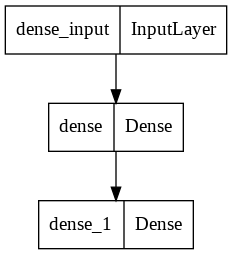

In [ ]:
plot_model(model_1)

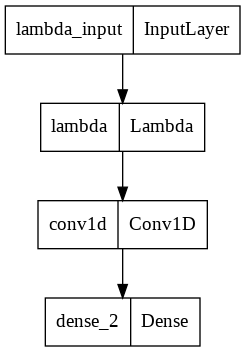

In [ ]:
plot_model(model_2)

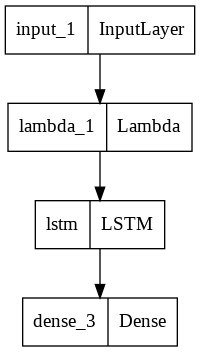

In [ ]:
plot_model(model_3)